In [1]:
import os

directory = f'/Users/lilimatic/greenspace'
os.chdir(directory)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.utils.class_weight import compute_sample_weight

#AUC and ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from functions.ml_data import *

df_copy = df.copy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.loc[:, df_copy.columns != 'covidsafety'], \
                                                    df_copy['covidsafety'], test_size=0.3)

In [4]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)


In [5]:
model = XGBClassifier(n_estimators=5, max_depth=5, learning_rate=1e-4, objective='binary:logistic')

#Model fit 
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
pred_prob = model.predict_proba(X_test)

In [7]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [8]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [9]:
# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.9047547846889952


In [10]:
# matplotlib
plt.style.use('seaborn')

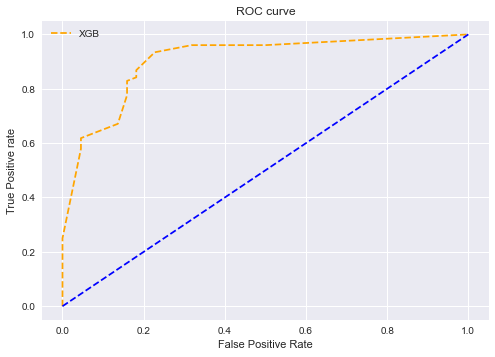

In [11]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [12]:
#feature importance
#Lg

In [13]:
log_reg = LogisticRegression()

In [14]:
log_reg.fit(X_train, y_train)

#log_reg.predict_proba(X_test)


LogisticRegression()

In [18]:
log_reg.intercept_

log_reg.coef_

array([[ 0.29452723, -0.46874984, -0.04501891,  0.12792139,  0.07986109,
         0.25588321,  1.58506408,  2.07929365, -0.70860839, -0.06769559,
        -0.34948604,  0.19080339,  0.04786923,  0.03540507, -0.15291114,
         0.50453098,  0.68573036,  0.30020525,  0.07674716, -0.40493662,
         0.23569576,  0.53708468,  0.29154303, -0.16704533,  0.34638213,
         0.1469227 ,  0.12416626,  0.09867803, -0.49782978,  0.12077283,
        -0.09029284, -0.14686812,  0.41909748, -1.00132998,  0.01361887,
        -0.06635088,  0.26956515,  0.05875881]])